## Importing Libraries + Dataset

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Preprocessing

In [4]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.650,E68,S
231,232,0,3,"Larsson, Mr. Bengt Edvin",male,29.0,0,0,347067,7.775,NaN,S
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.525,NaN,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S
695,696,0,2,"Chapman, Mr. Charles Henry",male,52.0,0,0,248731,13.500,NaN,S


In [5]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

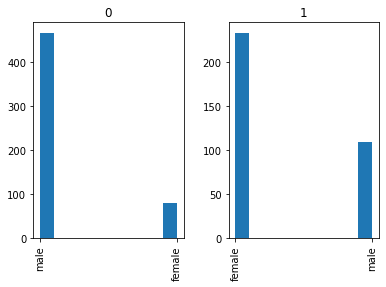

In [6]:
df.Sex.hist(by = df.Survived)

In [7]:
df.groupby(df.Sex).Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

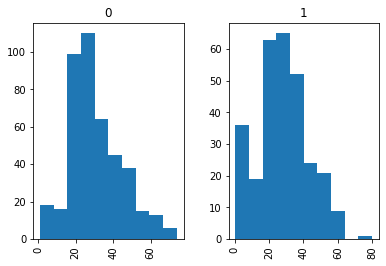

In [9]:
df.Age.hist(df.Survived)

<AxesSubplot:ylabel='Frequency'>

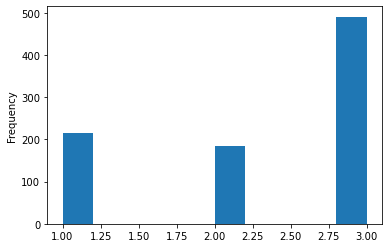

In [10]:
df.Pclass.plot.hist()

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

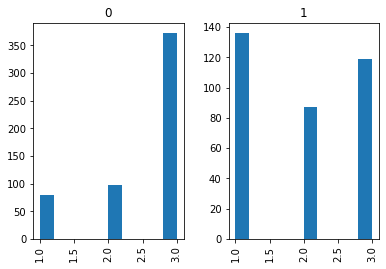

In [11]:
df.Pclass.hist(df.Survived)

In [12]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

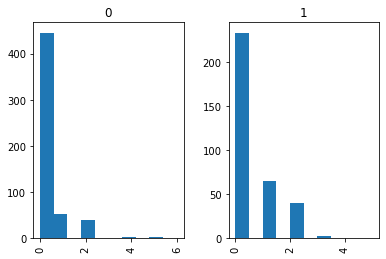

In [13]:
df.Parch.hist(df.Survived)

In [14]:
df[df.Parch == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
df[df.Parch > 0].Survived.mean()

0.5117370892018779

In [16]:
df[df.Parch == 0].Survived.mean()

0.34365781710914456

In [17]:
df[df.SibSp > 0].Survived.mean()

0.4664310954063604

In [18]:
df[df.SibSp == 0].Survived.mean()

0.34539473684210525

<AxesSubplot:>

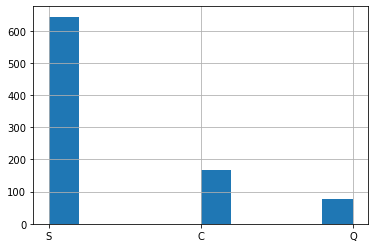

In [19]:
df.Embarked.hist()

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

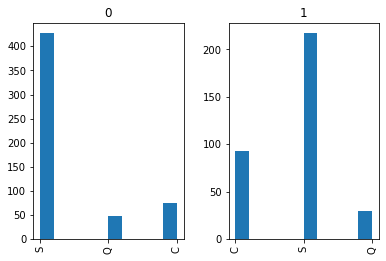

In [20]:
df.Embarked.hist(df.Survived)

In [21]:
df.groupby(df.Embarked).Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [22]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
df[df.Embarked == "S"].Survived.mean()

0.33695652173913043

In [24]:
df[df.Embarked == "S"].Survived.value_counts()

0    427
1    217
Name: Survived, dtype: int64

In [25]:
df[df.Pclass == 1].Ticket.sort_values()

257         110152
504         110152
759         110152
262         110413
558         110413
          ...     
537       PC 17761
544       PC 17761
92     W.E.P. 5734
745      WE/P 5735
540      WE/P 5735
Name: Ticket, Length: 216, dtype: object

In [26]:
final_df = pd.DataFrame()

In [27]:
final_df['PassengerId'] = df['PassengerId']
final_df['Age'] = df['Age']
final_df['SibSp'] = df['SibSp']
final_df['Parch'] = df['Parch']
final_df['Fare'] = df['Fare']
final_df['Male'] = pd.get_dummies(df.Sex, drop_first = True)
final_df['Pclass_2'] = pd.get_dummies(df.Pclass, drop_first = True)[2]
final_df['Pclass_3'] = pd.get_dummies(df.Pclass, drop_first = True)[3]
final_df['Embarked_Q'] = pd.get_dummies(df.Embarked, drop_first = True)['Q']
final_df['Embarked_S'] = pd.get_dummies(df.Embarked, drop_first = True)['S']
final_df['Survived'] = df['Survived']

In [28]:
final_df

,PassengerId,Age,SibSp,Parch,Fare,Male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Survived
0,1,22.0,1,0,7.2500,1,0,1,0,1,0
1,2,38.0,1,0,71.2833,0,0,0,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,0,1,1
3,4,35.0,1,0,53.1000,0,0,0,0,1,1
4,5,35.0,0,0,8.0500,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,27.0,0,0,13.0000,1,1,0,0,1,0
887,888,19.0,0,0,30.0000,0,0,0,0,1,1
888,889,NaN,1,2,23.4500,0,0,1,0,1,0
889,890,26.0,0,0,30.0000,1,0,0,0,0,1


In [29]:
final_df.isna().sum()

PassengerId      0
Age            177
SibSp            0
Parch            0
Fare             0
Male             0
Pclass_2         0
Pclass_3         0
Embarked_Q       0
Embarked_S       0
Survived         0
dtype: int64

In [30]:
final_df.Age.mean(skipna = True)

29.69911764705882

In [31]:
final_df.Age.fillna(final_df.Age.mean(skipna = True), inplace = True )

In [32]:
final_df.isna().sum()

PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
Male           0
Pclass_2       0
Pclass_3       0
Embarked_Q     0
Embarked_S     0
Survived       0
dtype: int64

## Building the model

In [33]:
X = final_df[['Age','SibSp','Parch','Fare','Male','Pclass_2','Pclass_3','Embarked_Q','Embarked_S']]
y = final_df['Survived']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [35]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 8, activation = 'relu', input_shape = [len(X.keys())], kernel_regularizer=regularizers.l2(0.001)))
#model.add(tf.keras.layers.Dense(units = 16, activation = 'relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = 'accuracy')

Epoch 1/1000
10/10 [==============================] - 1s 19ms/step - loss: 17.4564 - accuracy: 0.3955 - val_loss: 17.6484 - val_accuracy: 0.3590
Epoch 2/1000
10/10 [==============================] - 0s 5ms/step - loss: 16.2170 - accuracy: 0.3955 - val_loss: 16.3582 - val_accuracy: 0.3590
Epoch 3/1000
10/10 [==============================] - 0s 4ms/step - loss: 15.0000 - accuracy: 0.3955 - val_loss: 15.1118 - val_accuracy: 0.3590
Epoch 4/1000
10/10 [==============================] - 0s 5ms/step - loss: 13.7956 - accuracy: 0.3955 - val_loss: 13.9135 - val_accuracy: 0.3590
Epoch 5/1000
10/10 [==============================] - 0s 4ms/step - loss: 12.6638 - accuracy: 0.3955 - val_loss: 12.7322 - val_accuracy: 0.3590
Epoch 6/1000
10/10 [==============================] - 0s 4ms/step - loss: 11.5450 - accuracy: 0.3955 - val_loss: 11.5781 - val_accuracy: 0.3590
Epoch 7/1000
10/10 [==============================] - 0s 7ms/step - loss: 10.4443 - accuracy: 0.3955 - val_loss: 10.4493 - val_accuracy

Epoch 58/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.6102 - accuracy: 0.7042 - val_loss: 0.6050 - val_accuracy: 0.7083
Epoch 59/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.6066 - accuracy: 0.7074 - val_loss: 0.5998 - val_accuracy: 0.6955
Epoch 60/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.6037 - accuracy: 0.6945 - val_loss: 0.5951 - val_accuracy: 0.6955
Epoch 61/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.6006 - accuracy: 0.6913 - val_loss: 0.5930 - val_accuracy: 0.6987
Epoch 62/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5990 - accuracy: 0.7138 - val_loss: 0.5927 - val_accuracy: 0.7147
Epoch 63/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5923 - accuracy: 0.7042 - val_loss: 0.5886 - val_accuracy: 0.7019
Epoch 64/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5881 - accuracy: 0.7074 - val_loss: 0.5846 - val_accuracy: 0.7019

10/10 [==============================] - 0s 4ms/step - loss: 0.5233 - accuracy: 0.7717 - val_loss: 0.5183 - val_accuracy: 0.7564
Epoch 116/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5225 - accuracy: 0.7717 - val_loss: 0.5199 - val_accuracy: 0.7628
Epoch 117/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5224 - accuracy: 0.7781 - val_loss: 0.5184 - val_accuracy: 0.7468
Epoch 118/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5215 - accuracy: 0.7814 - val_loss: 0.5181 - val_accuracy: 0.7532
Epoch 119/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5237 - accuracy: 0.7685 - val_loss: 0.5168 - val_accuracy: 0.7628
Epoch 120/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5208 - accuracy: 0.7814 - val_loss: 0.5201 - val_accuracy: 0.7500
Epoch 121/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5213 - accuracy: 0.7653 - val_loss: 0.5190 - val_accuracy: 0.7532
Epoch 1

Epoch 172/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.7814 - val_loss: 0.5059 - val_accuracy: 0.7692
Epoch 173/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.5037 - accuracy: 0.7942 - val_loss: 0.5055 - val_accuracy: 0.7628
Epoch 174/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5024 - accuracy: 0.7749 - val_loss: 0.5063 - val_accuracy: 0.7532
Epoch 175/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.5039 - accuracy: 0.7685 - val_loss: 0.5062 - val_accuracy: 0.7532
Epoch 176/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.5051 - accuracy: 0.7878 - val_loss: 0.5047 - val_accuracy: 0.7788
Epoch 177/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.5013 - accuracy: 0.7749 - val_loss: 0.5063 - val_accuracy: 0.7500
Epoch 178/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5016 - accuracy: 0.7781 - val_loss: 0.5071 - val_accuracy:

10/10 [==============================] - 0s 5ms/step - loss: 0.5023 - accuracy: 0.7910 - val_loss: 0.5019 - val_accuracy: 0.7788
Epoch 229/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4888 - accuracy: 0.7942 - val_loss: 0.5006 - val_accuracy: 0.7564
Epoch 230/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.4955 - accuracy: 0.7556 - val_loss: 0.5050 - val_accuracy: 0.7660
Epoch 231/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4926 - accuracy: 0.7524 - val_loss: 0.4995 - val_accuracy: 0.7660
Epoch 232/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4893 - accuracy: 0.7942 - val_loss: 0.4994 - val_accuracy: 0.7596
Epoch 233/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.4892 - accuracy: 0.7685 - val_loss: 0.5004 - val_accuracy: 0.7564
Epoch 234/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4900 - accuracy: 0.7846 - val_loss: 0.4995 - val_accuracy: 0.7692
Epoch 2

Epoch 285/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4810 - accuracy: 0.7846 - val_loss: 0.4968 - val_accuracy: 0.7724
Epoch 286/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4814 - accuracy: 0.7846 - val_loss: 0.4978 - val_accuracy: 0.7660
Epoch 287/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4811 - accuracy: 0.7910 - val_loss: 0.4959 - val_accuracy: 0.7788
Epoch 288/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4790 - accuracy: 0.7974 - val_loss: 0.4970 - val_accuracy: 0.7692
Epoch 289/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4805 - accuracy: 0.7878 - val_loss: 0.4972 - val_accuracy: 0.7692
Epoch 290/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4788 - accuracy: 0.7878 - val_loss: 0.4956 - val_accuracy: 0.7756
Epoch 291/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4802 - accuracy: 0.7942 - val_loss: 0.4962 - val_accuracy:

Epoch 342/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4737 - accuracy: 0.7878 - val_loss: 0.4927 - val_accuracy: 0.7756
Epoch 343/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.4722 - accuracy: 0.7910 - val_loss: 0.4933 - val_accuracy: 0.7821
Epoch 344/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.4752 - accuracy: 0.7846 - val_loss: 0.4945 - val_accuracy: 0.7692
Epoch 345/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4723 - accuracy: 0.7910 - val_loss: 0.4937 - val_accuracy: 0.7756
Epoch 346/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4720 - accuracy: 0.7910 - val_loss: 0.4927 - val_accuracy: 0.7853
Epoch 347/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4716 - accuracy: 0.7910 - val_loss: 0.4937 - val_accuracy: 0.7660
Epoch 348/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4739 - accuracy: 0.7910 - val_loss: 0.4943 - val_accuracy:

Epoch 399/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.4661 - accuracy: 0.7942 - val_loss: 0.4919 - val_accuracy: 0.7788
Epoch 400/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4669 - accuracy: 0.7942 - val_loss: 0.4922 - val_accuracy: 0.7821
Epoch 401/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4668 - accuracy: 0.7974 - val_loss: 0.4953 - val_accuracy: 0.7596
Epoch 402/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4685 - accuracy: 0.7910 - val_loss: 0.4923 - val_accuracy: 0.7821
Epoch 403/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.4672 - accuracy: 0.7942 - val_loss: 0.4929 - val_accuracy: 0.7756
Epoch 404/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.4674 - accuracy: 0.7974 - val_loss: 0.4913 - val_accuracy: 0.7788
Epoch 405/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4674 - accuracy: 0.7974 - val_loss: 0.4924 - val_accuracy:

10/10 [==============================] - 0s 3ms/step - loss: 0.4614 - accuracy: 0.7974 - val_loss: 0.4905 - val_accuracy: 0.7821
Epoch 456/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.4612 - accuracy: 0.7942 - val_loss: 0.4904 - val_accuracy: 0.7853
Epoch 457/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4626 - accuracy: 0.7974 - val_loss: 0.4900 - val_accuracy: 0.7853
Epoch 458/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4610 - accuracy: 0.8006 - val_loss: 0.4917 - val_accuracy: 0.7628
Epoch 459/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4606 - accuracy: 0.7942 - val_loss: 0.4904 - val_accuracy: 0.7821
Epoch 460/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.4601 - accuracy: 0.7942 - val_loss: 0.4907 - val_accuracy: 0.7788
Epoch 461/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.4601 - accuracy: 0.7974 - val_loss: 0.4908 - val_accuracy: 0.7821
Epoch 4

Epoch 512/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4563 - accuracy: 0.8006 - val_loss: 0.4911 - val_accuracy: 0.7821
Epoch 513/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4553 - accuracy: 0.7974 - val_loss: 0.4902 - val_accuracy: 0.7821
Epoch 514/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.4560 - accuracy: 0.8006 - val_loss: 0.4903 - val_accuracy: 0.7821
Epoch 515/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4568 - accuracy: 0.7910 - val_loss: 0.4912 - val_accuracy: 0.7853
Epoch 516/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4583 - accuracy: 0.7974 - val_loss: 0.4916 - val_accuracy: 0.7660
Epoch 517/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.4569 - accuracy: 0.7974 - val_loss: 0.4908 - val_accuracy: 0.7853
Epoch 518/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4554 - accuracy: 0.7974 - val_loss: 0.4901 - val_accuracy:

Epoch 569/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4506 - accuracy: 0.8006 - val_loss: 0.4889 - val_accuracy: 0.7885
Epoch 570/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4523 - accuracy: 0.8006 - val_loss: 0.4886 - val_accuracy: 0.7885
Epoch 571/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4519 - accuracy: 0.7942 - val_loss: 0.4897 - val_accuracy: 0.7788
Epoch 572/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.4502 - accuracy: 0.8006 - val_loss: 0.4904 - val_accuracy: 0.7756
Epoch 573/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4521 - accuracy: 0.8006 - val_loss: 0.4906 - val_accuracy: 0.7788
Epoch 574/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.4509 - accuracy: 0.8006 - val_loss: 0.4914 - val_accuracy: 0.7917
Epoch 575/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4507 - accuracy: 0.7942 - val_loss: 0.4890 - val_accuracy:

Epoch 626/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.4464 - accuracy: 0.8071 - val_loss: 0.4879 - val_accuracy: 0.7885
Epoch 627/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4494 - accuracy: 0.8039 - val_loss: 0.4912 - val_accuracy: 0.7564
Epoch 628/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4466 - accuracy: 0.7974 - val_loss: 0.4888 - val_accuracy: 0.7917
Epoch 629/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4465 - accuracy: 0.8039 - val_loss: 0.4897 - val_accuracy: 0.7724
Epoch 630/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4464 - accuracy: 0.8006 - val_loss: 0.4885 - val_accuracy: 0.7917
Epoch 631/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4471 - accuracy: 0.8039 - val_loss: 0.4881 - val_accuracy: 0.7949
Epoch 632/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4465 - accuracy: 0.8006 - val_loss: 0.4899 - val_accuracy:

Epoch 683/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4454 - accuracy: 0.8039 - val_loss: 0.4898 - val_accuracy: 0.7596
Epoch 684/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4399 - accuracy: 0.8103 - val_loss: 0.4872 - val_accuracy: 0.7885
Epoch 685/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4413 - accuracy: 0.8103 - val_loss: 0.4868 - val_accuracy: 0.7853
Epoch 686/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4407 - accuracy: 0.8071 - val_loss: 0.4872 - val_accuracy: 0.7885
Epoch 687/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.4404 - accuracy: 0.8039 - val_loss: 0.4878 - val_accuracy: 0.7821
Epoch 688/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.4424 - accuracy: 0.8103 - val_loss: 0.4874 - val_accuracy: 0.7885
Epoch 689/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4402 - accuracy: 0.8039 - val_loss: 0.4874 - val_accuracy:

Epoch 740/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.4358 - accuracy: 0.8103 - val_loss: 0.4915 - val_accuracy: 0.7724
Epoch 741/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.4317 - accuracy: 0.8264 - val_loss: 0.4899 - val_accuracy: 0.7821
Epoch 742/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.4350 - accuracy: 0.8264 - val_loss: 0.4894 - val_accuracy: 0.7788
Epoch 743/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4339 - accuracy: 0.8199 - val_loss: 0.4926 - val_accuracy: 0.7596
Epoch 744/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.4325 - accuracy: 0.8167 - val_loss: 0.4901 - val_accuracy: 0.7788
Epoch 745/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4334 - accuracy: 0.8135 - val_loss: 0.4909 - val_accuracy: 0.7756
Epoch 746/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.4323 - accuracy: 0.8232 - val_loss: 0.4890 - val_accuracy:

10/10 [==============================] - 0s 5ms/step - loss: 0.4296 - accuracy: 0.8296 - val_loss: 0.4909 - val_accuracy: 0.7756
Epoch 797/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.4295 - accuracy: 0.8296 - val_loss: 0.4904 - val_accuracy: 0.7756
Epoch 798/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.4292 - accuracy: 0.8296 - val_loss: 0.4918 - val_accuracy: 0.7724
Epoch 799/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.4296 - accuracy: 0.8328 - val_loss: 0.4935 - val_accuracy: 0.7756
Epoch 800/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4312 - accuracy: 0.8232 - val_loss: 0.4927 - val_accuracy: 0.7660
Epoch 801/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4294 - accuracy: 0.8328 - val_loss: 0.4899 - val_accuracy: 0.7788
Epoch 802/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4277 - accuracy: 0.8360 - val_loss: 0.4908 - val_accuracy: 0.7756
Epoch 8

Epoch 853/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4282 - accuracy: 0.8232 - val_loss: 0.4914 - val_accuracy: 0.7788
Epoch 854/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.4244 - accuracy: 0.8328 - val_loss: 0.4928 - val_accuracy: 0.7821
Epoch 855/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4240 - accuracy: 0.8328 - val_loss: 0.4913 - val_accuracy: 0.7788
Epoch 856/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4273 - accuracy: 0.8199 - val_loss: 0.4928 - val_accuracy: 0.7724
Epoch 857/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4262 - accuracy: 0.8296 - val_loss: 0.4921 - val_accuracy: 0.7821
Epoch 858/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.4234 - accuracy: 0.8328 - val_loss: 0.4943 - val_accuracy: 0.7628
Epoch 859/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.4265 - accuracy: 0.8199 - val_loss: 0.4907 - val_accuracy:

Epoch 910/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4215 - accuracy: 0.8328 - val_loss: 0.4917 - val_accuracy: 0.7756
Epoch 911/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4204 - accuracy: 0.8360 - val_loss: 0.4921 - val_accuracy: 0.7788
Epoch 912/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.4209 - accuracy: 0.8360 - val_loss: 0.4924 - val_accuracy: 0.7724
Epoch 913/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.4210 - accuracy: 0.8328 - val_loss: 0.4913 - val_accuracy: 0.7788
Epoch 914/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.4225 - accuracy: 0.8328 - val_loss: 0.4913 - val_accuracy: 0.7756
Epoch 915/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.4211 - accuracy: 0.8328 - val_loss: 0.4918 - val_accuracy: 0.7788
Epoch 916/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.4203 - accuracy: 0.8360 - val_loss: 0.4914 - val_accuracy:

Epoch 967/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.4195 - accuracy: 0.8360 - val_loss: 0.4916 - val_accuracy: 0.7821
Epoch 968/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.4184 - accuracy: 0.8360 - val_loss: 0.4930 - val_accuracy: 0.7756
Epoch 969/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4233 - accuracy: 0.8360 - val_loss: 0.4935 - val_accuracy: 0.7756
Epoch 970/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.4186 - accuracy: 0.8328 - val_loss: 0.4985 - val_accuracy: 0.7564
Epoch 971/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.4185 - accuracy: 0.8360 - val_loss: 0.4922 - val_accuracy: 0.7853
Epoch 972/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.4183 - accuracy: 0.8360 - val_loss: 0.4921 - val_accuracy: 0.7821
Epoch 973/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.4193 - accuracy: 0.8328 - val_loss: 0.4952 - val_accuracy:

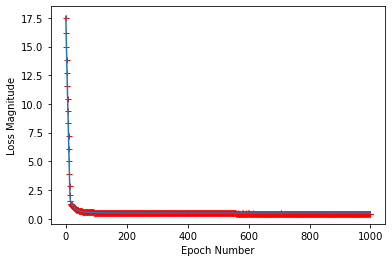

In [36]:
mdl = model.fit(X_train, y_train, epochs = 1000, validation_split = 0.5)
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(mdl.history['loss'],'r+')
plt.plot(mdl.history['val_loss'])

In [38]:
val_loss, val_accuracy = model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.8358
